Single image reconstruction using autoencoders.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model


In [2]:
SIZE=256

In [4]:
img=cv2.imread('dog.3.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(256, 256, 3)


In [5]:
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 256, 256, 3)


In [6]:
img_array = img_array.astype('float32') / 255.


In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [8]:
model.fit(img_array, img_array, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 13s 13s/step - loss: 0.0627 - accuracy: 0.2844
Epoch 2/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0556 - accuracy: 0.2916
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0592 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0619 - accuracy: 0.4385
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0606 - accuracy: 0.4429
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0584 - accuracy: 0.4430
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0558 - accuracy: 0.4370
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0533 - accuracy: 0.2897
Epoch 9/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0535 - accuracy: 0.2826
Epoch 10/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0513 - accuracy: 0.4360
Epoch 11/

In [9]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 118ms/step


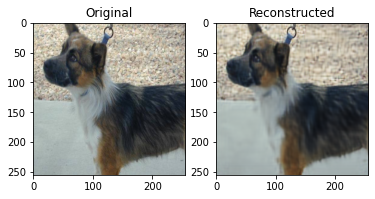

In [10]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.title('Reconstructed')
plt.show()